### Exploratory Data Analysis
**Author**: Matana Pornluanprasert<br>
**Date**: 26 November 2024<br>

**Data Source**: <br>
Pad Thai Recipe Dataset:

**Data Sourcing Code**: <br>
[https://github.com/beungz/pad-thai-recipe-data-sourcing](https://github.com/beungz/pad-thai-recipe-data-sourcing)
***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Read the CSV into the dataframe
dataset_directory = "final_dataset_for_kaggle/"
try:
    df_combined_recipe = pd.read_csv(f"{dataset_directory}combined_recipe.csv")
    df_combined_ingredient = pd.read_csv(f"{dataset_directory}combined_ingredient.csv")
    df_ingredient_sorted_recipe_count = pd.read_csv(f"{dataset_directory}ingredient_sorted_recipe_count.csv")
    df_ingredient_top30 = pd.read_csv(f"{dataset_directory}top30.csv")
    df_ingredient_top10 = pd.read_csv(f"{dataset_directory}top10.csv")
except Exception as err:
    print(f"Error occurred: {err}")

# Generate top30 and top10 list for visualization section
df_top30_list = df_ingredient_sorted_recipe_count.head(30)
top_10_ingredients = df_ingredient_sorted_recipe_count.head(10)['common_ingredient_name']

#### **Data Context and Data Sampling**

In [2]:
# Data Sampling
print("Data Sampling")
print("---------------")

print("\nRecipe Data")
print(df_combined_recipe.sample(n=5))

print("\nIngredient Data")
print(df_combined_ingredient.sample(n=5))

Data Sampling
---------------

Recipe Data
     Unnamed: 0 recipe_source recipe_id  \
123         123        yummly      Y124   
131         131        yummly      Y132   
142         142        yummly      Y143   
17           17        yummly      Y018   
29           29        yummly      Y030   

                                      recipe_name   recipe_creator_name  \
123           Chrissy Teigen's Pad Thai Carbonara         GET THE GLOSS   
131  Veggie Pad Thai Zoodles with Peanut Dressing       A SAUCY KITCHEN   
142                           Vegetarian Pad Thai  HUNGRY HEALTHY HAPPY   
17                        Easy Vegetable Pad Thai          VEGGIE BELLY   
29                                       Pad Thai             TASTEMADE   

     recipe_ratings  recipe_num_of_reviewers  recipe_num_saved  \
123             4.5                        2              39.0   
131             5.0                        1             120.0   
142             5.0                        1     

***
This Pad Thai recipes and ingredient data is collected from two data sources: Yummly.com and Allrecipes.com in October 2024, by web scraping. It comprises of 160 recipes from Yummly, and 25 recipes from Allrecipes, all of which includes recipe name, creator name, review score (ratings), link to website, and corresponding ingredient name/amount/unit. The recipes do not include steps required to prepare and cook Pad Thai<br>

There are some missing data in ingredient amount/unit from the sources (original_ingredient_amount and original_ingredient_unit) and are intentionally left missing as it is. The new_ingredient_unit utilitzed default_unit, to fill in missing ingredient units. Unit conversion has been applied such that all similar ingredients used the same default_unit, where possible.<br>

Normalized ratings are provided in order to facilitate comparison of ratings from two different recipe sources.<br>

This recipe data may not represent traditional Pad Thai recipe in Thailand, as its sources are from international community. It provides a general overview of the characters of Pad Thai recipes that are popular outside Thailand.
***

#### **Data Structure**

In [3]:
# Data Structure
print("\nData Structure")
print("---------------")

print("\nRecipe Data")
print(f"Dimensions: {df_combined_recipe.shape}")
print(f"Data Types:\n{df_combined_recipe.dtypes}")
print(f"Missing Values:\n{df_combined_recipe.isnull().sum()}")

print("\nIngredient Data")
print(f"Dimensions: {df_combined_ingredient.shape}")
print(f"Data Types:\n{df_combined_ingredient.dtypes}")
print(f"Missing Values:\n{df_combined_ingredient.isnull().sum()}")


Data Structure
---------------

Recipe Data
Dimensions: (185, 10)
Data Types:
Unnamed: 0                     int64
recipe_source                 object
recipe_id                     object
recipe_name                   object
recipe_creator_name           object
recipe_ratings               float64
recipe_num_of_reviewers        int64
recipe_num_saved             float64
recipe_link                   object
recipe_ratings_normalized    float64
dtype: object
Missing Values:
Unnamed: 0                    0
recipe_source                 0
recipe_id                     0
recipe_name                   0
recipe_creator_name           0
recipe_ratings                0
recipe_num_of_reviewers       0
recipe_num_saved             25
recipe_link                   0
recipe_ratings_normalized     0
dtype: int64

Ingredient Data
Dimensions: (2922, 13)
Data Types:
Unnamed: 0                      int64
ingredient_id                  object
recipe_id                      object
ingredient_name       

***
#### **Interpretation of Data Structure**

There are 185 Pad Thai recipes (recipe_name), each with unique recipe id (recipe_id) assigned. Relevant detail of each recipe, including recipe name (recipe_name), recipe source (recipe_source), creator name (recipe_creator_name), review scores (recipe_ratings), normalized scores (recipe_ratings_normalized), number of reviewers (recipe_num_of_reviewers), link to website (recipe_link), list of ingredients (ingredient_id, ingredient_name, common_ingredient_name, ingredient_category), and their corresponding amount/unit (original_ingredient_amount, original_ingredient_unit, new_ingredient_amount, new_ingredient_unit) are provided.<br>

The number of saved recipes (recipe_num_saved) are from Yummly.com only, as it does not exist on Allrecipes.com. The ingredient_remainder comes from a description/detail of how to prepare ingredients before cooking, and is available on Yummly.com. On Allrecipes.com, the detail/preparation note of ingredients are included in the name of the ingredients themselves.<br>

There are some missing data in ingredient amount/unit from the sources (original_ingredient_amount and original_ingredient_unit), as the creators did not specify them on the websites. We left them  missing as it is, and provide new_ingredient_unit as a substitute. The new_ingredient_unit utilitzed default_unit, to fill in missing ingredient units. The ingredient amount, both original and new, are numeric (float)<br>

The review scores are given by users on the two websites, on an integer scale from 1 to 5, with recipe_ratings as a simple average (float). We also calculate normalized ratings (float) and include it here as recipe_ratings_normalized. All recipes in this dataset have review scores, with at least one reviewer.<br>
***

#### **Descriptive Statistics**

In [4]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")

print("\nRecipe Data")
print("----------------------")
numeric_columns1 = df_combined_recipe.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_combined_recipe[numeric_columns1].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_combined_recipe[numeric_columns1].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_combined_recipe[numeric_columns1].skew())
print("Kurtosis:")
print(df_combined_recipe[numeric_columns1].kurt())

print("\nIngredient Data: Top 30")
print("----------------------")
numeric_columns2 = df_ingredient_top30.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_ingredient_top30[numeric_columns2].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_ingredient_top30[numeric_columns2].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_ingredient_top30[numeric_columns2].skew())
print("Kurtosis:")
print(df_ingredient_top30[numeric_columns2].kurt())


Descriptive Statistics
----------------------

Recipe Data
----------------------
Central Tendency Measures:
      Unnamed: 0  recipe_ratings  recipe_num_of_reviewers  recipe_num_saved  \
mean        92.0        4.235674                17.243243        1227.13125   
50%         92.0        4.500000                 2.000000         170.50000   

      recipe_ratings_normalized  
mean                   0.493320  
50%                    0.524874  

Dispersion Measures:
     Unnamed: 0  recipe_ratings  recipe_num_of_reviewers  recipe_num_saved  \
std   53.549043        0.942097                72.269501       5880.782784   
min    0.000000        1.000000                 1.000000          4.000000   
max  184.000000        5.000000               764.000000      68000.000000   

     recipe_ratings_normalized  
std                   0.118206  
min                   0.087374  
max                   0.598381  

Distribution Measures:
Skewness:
Unnamed: 0                   0.000000
recipe_rati

***
#### **Interpretation of Descriptive Statistics**

The mean and median are given here to represent the central location of the data, which are ingredient amount and review score, while standard deviation, min and max help us understand more about the range and spread of data. Skewness indicate if it is right skew (positive), left skew (negative), or symmetric (0). Kurtosis helps us understand the tailedness of the data distribution (close to zero: normal distribution; higher values: heavier tails)<br>

For example, average amount of rice noodle is 7.975741 ounce and median is approximately the same, so the amount of rice noodle may have symmetric distribution. It ranges from 0.000000 to 16.014378 ounce, with standard deviation of 3.096320. It is right skew (0.623504) and based on the kurtosis (0.742942), we may assume that it is likely to be normal distribution.<br>

Features with skewness and kurtosis between -2 to +2, which may indicate that they may be Gaussian-like<br>
- rice noodle
- soy sauce
- egg
- fish sauce
- carrot
- brown sugar
- chicken breast
- shrimp
- firm tofu
- salt
- minced ginger
- bell pepper
- sesame oil
***

#### **Data Quality**

In [5]:
# Data Quality
print("\nData Quality")
print("------------")

print("\nRecipe Data")
print("------------")
print(f"Duplicated Rows: {df_combined_recipe.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_combined_recipe.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nIngredient Data")
print("------------")
print(f"Duplicated Rows: {df_combined_ingredient.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_combined_ingredient.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------

Recipe Data
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                                                         most_frequent_value
Unnamed: 0                                                                 0
recipe_source                                                         yummly
recipe_id                                                               Y001
recipe_name                                                         Pad Thai
recipe_creator_name                                          A SAUCY KITCHEN
recipe_ratings                                                           5.0
recipe_num_of_reviewers                                                    1
recipe_num_saved                                                      1000.0
recipe_link                https://www.yummly.com/recipe/Chicken-Pad-Thai...
recipe_ratings_normalized                                           0.587374

Ingredient Data
------------
Duplicated Rows: 

***
#### **Interpretation of Data Quality**

Duplicated Rows: There is no duplicated rows in the dataset.<br>

Inconsistent Values: Most frequent values are shown here for each column to help identify inconsistencies or anomalies. Based on most frequent values, there is no potential inconsistencies or anomalies.<br>
***

#### **Variable Relationships**


Variable Relationships
----------------------

Recipe Data
----------------------
Correlation Matrix:
                           Unnamed: 0  recipe_ratings  \
Unnamed: 0                   1.000000        0.146783   
recipe_ratings               0.146783        1.000000   
recipe_num_of_reviewers      0.222098       -0.001055   
recipe_num_saved            -0.150199        0.012204   
recipe_ratings_normalized    0.165134        0.999496   

                           recipe_num_of_reviewers  recipe_num_saved  \
Unnamed: 0                                0.222098         -0.150199   
recipe_ratings                           -0.001055          0.012204   
recipe_num_of_reviewers                   1.000000          0.910420   
recipe_num_saved                          0.910420          1.000000   
recipe_ratings_normalized                 0.013556          0.012204   

                           recipe_ratings_normalized  
Unnamed: 0                                  0.165134  
recipe_rati

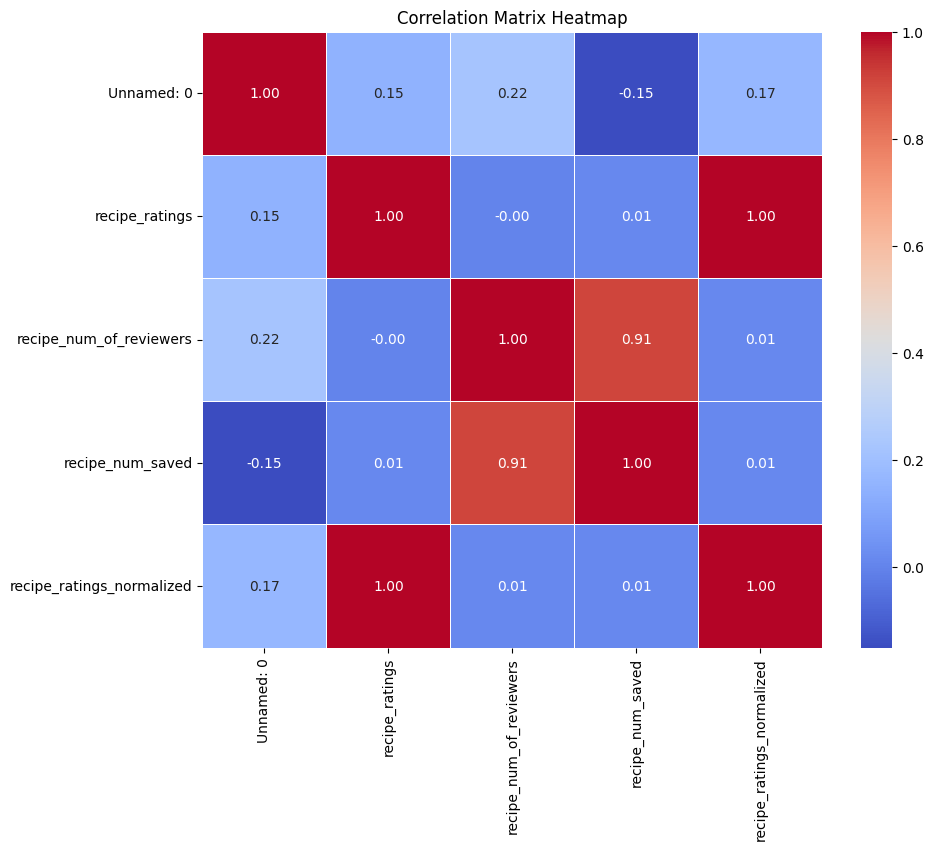


Ingredient Data: Top 30
----------------------
Correlation Matrix:
                                                    Unnamed: 0  \
Unnamed: 0                                            1.000000   
recipe_ratings                                        0.146783   
recipe_ratings_normalized                             0.165134   
peanut                                                0.148422   
garlic                                               -0.009619   
scallion / spring onion / green onion                -0.020292   
rice noodle                                           0.108890   
bean sprout                                           0.202909   
soy sauce                                            -0.096568   
coriander / cilantro                                 -0.209455   
egg                                                   0.203079   
fish sauce                                            0.082453   
carrot                                               -0.051369   
lime jui

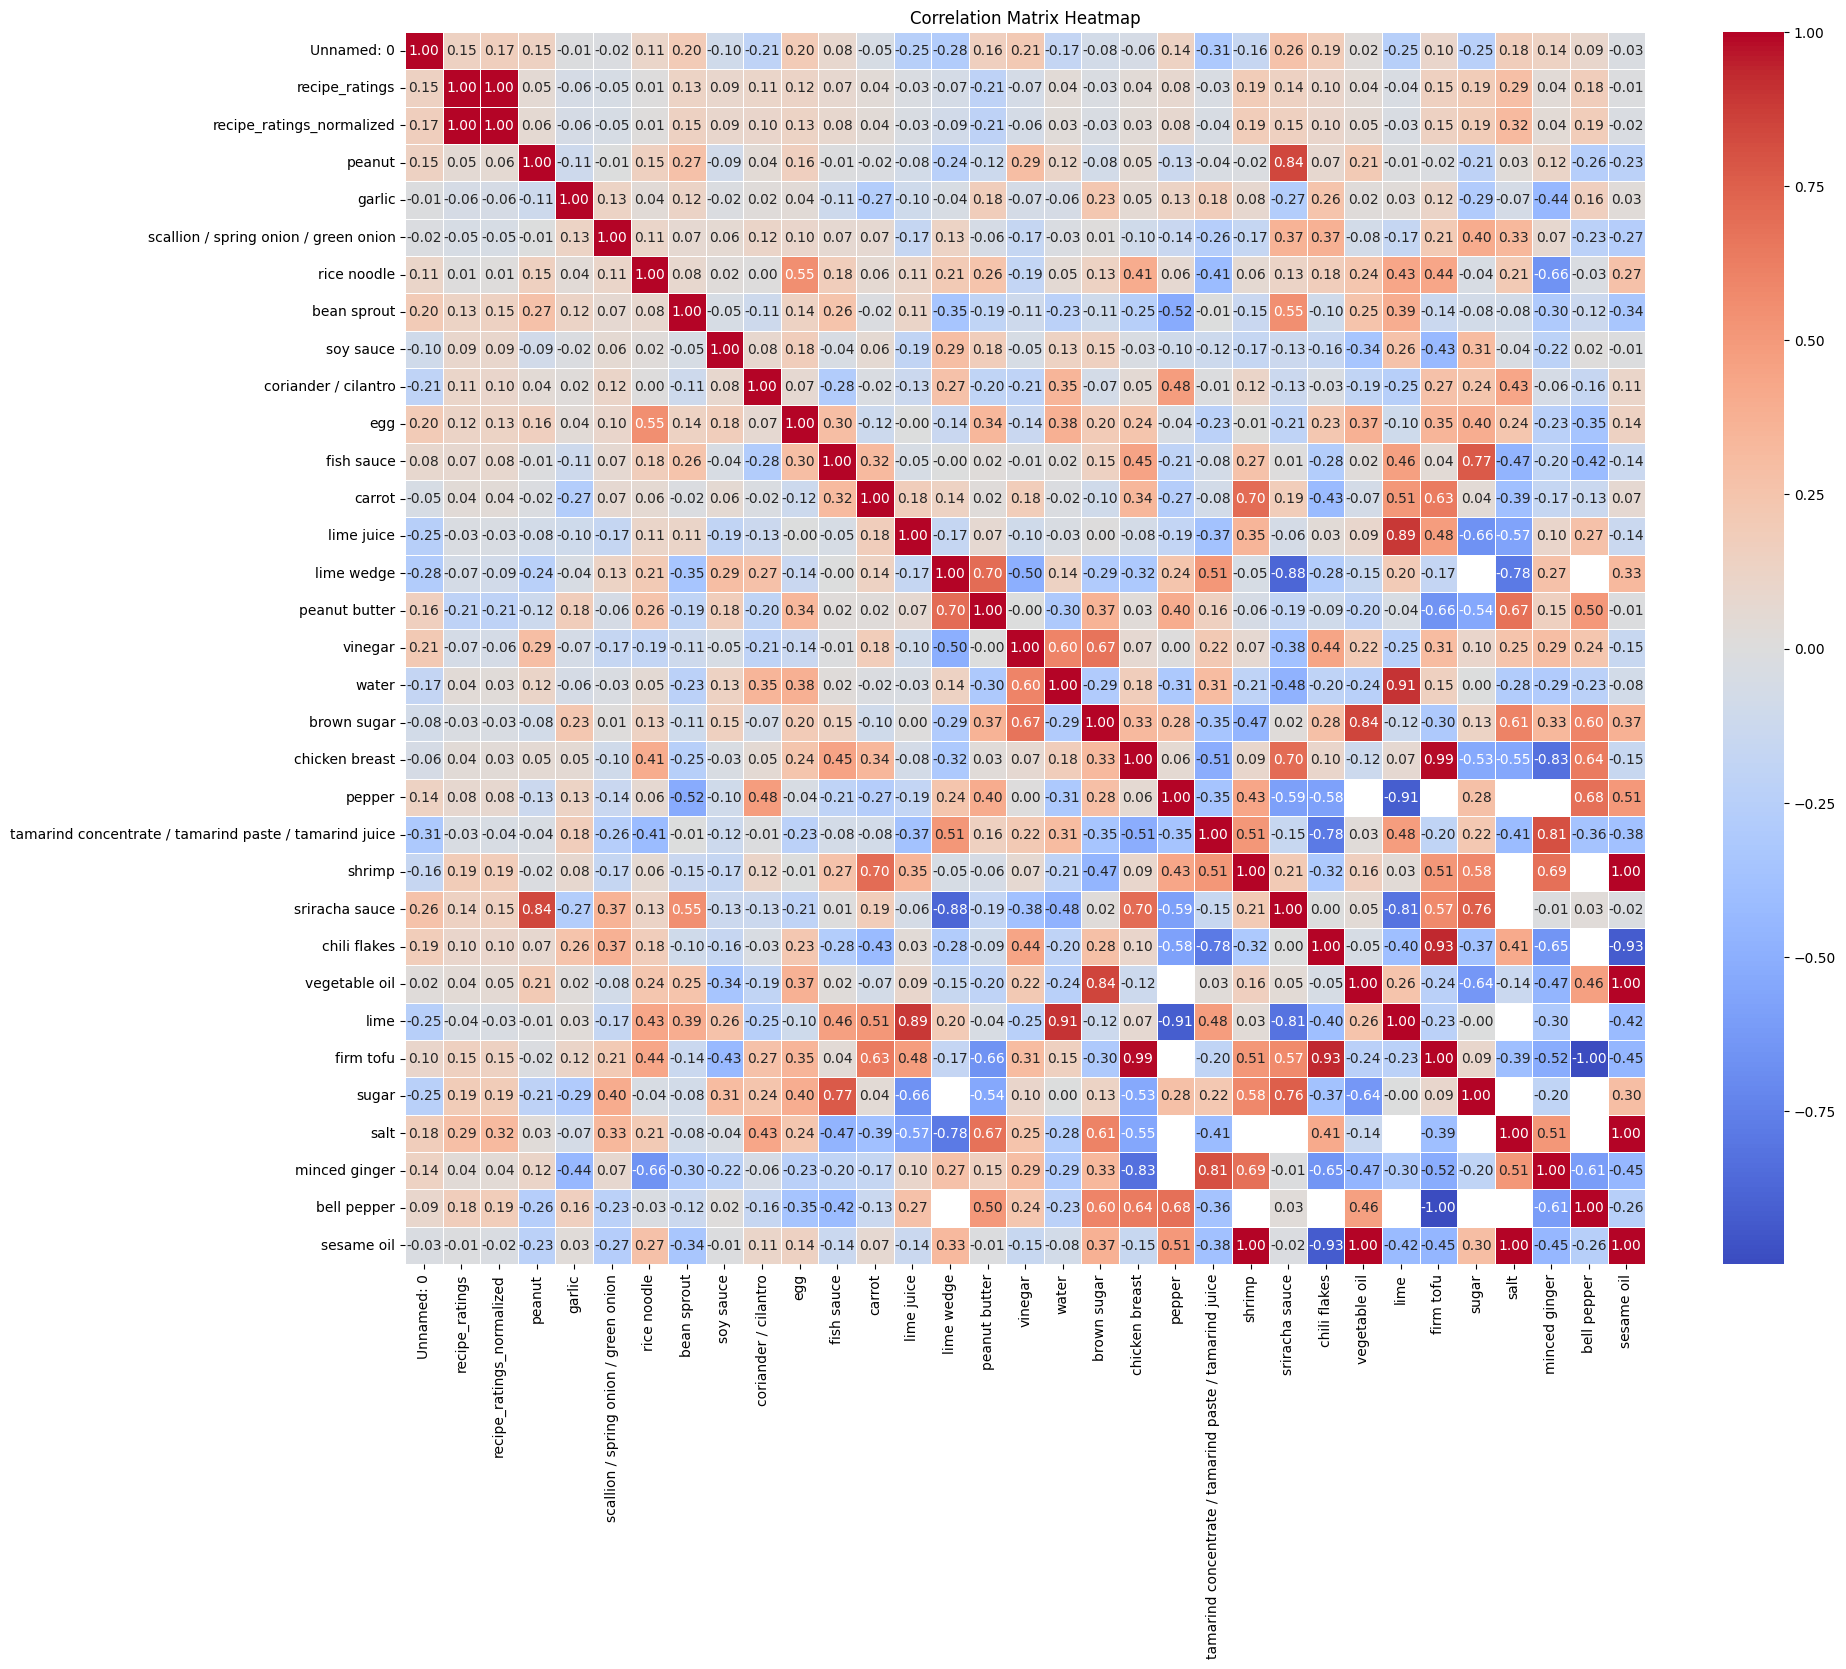

In [6]:
# Variable Relationships
print("\nVariable Relationships")
print("----------------------")

print("\nRecipe Data")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix1 = df_combined_recipe[numeric_columns1].corr()
print(correlation_matrix1)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nIngredient Data: Top 30")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix2 = df_ingredient_top30[numeric_columns2].corr()
print(correlation_matrix2)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

***
#### **Interpretation of Variable Relationships**

**Review Scores:**<br>
recipe_ratings_normalized are perfectly correlated (1.00) to recipe_ratings, as it was mathematically derived from recipe_ratings.

**Number of Reviewers and recipe saved:**<br>
High positive correlation (>=0.80) between recipe_num_of_reviewers and recipe_num_saved

**Ingredient Amount:**<br>
High positive correlation (>=0.80) between some pairs of ingredients:
- peanut <> sriracha sauce
- lime juice <> lime
- water <> lime
- brown sugar <> vegetable oil
- chicken breast <> firm tofu
- tamarind <> minced ginger
- shrimp <> sesame oil
- chili flakes <> firm tofu
- vegetable oil <> sesame oil
- salt <> sesame oil<br>

This may indicate that these pairs of ingredients are commonly used together

High negative correlation (<=-0.80) between<br>
- lime wedge <> sriracha sauce
- chicken breast <> minced ginger
- pepper <> lime
- chili flakes <> sesame oil
- lime <> sriracha sauce
- firm tofu <> bell pepper<br>

This may indicate that, if one of the pair are used, then another will not likely be used (or decrease)

**Review Scores vs. Ingredient Amount:**<br>
No significant correlation between review scores (recipe_ratings / recipe_ratings_normalized) and all top 30 ingredients.<br>

Those variable pairs with high positive correlation suggests that as one variable in the pair increases, another should also tend to increase.
In contrast, variable pairs with high negative correlation suggests that as one variable in the pair increases, another tends to decrease.<br>
***

#### **Data Visualization**


Data Visualization

Box plot and histogram of review scores, number of reviewers, and number of recipe saved by users
----------------------


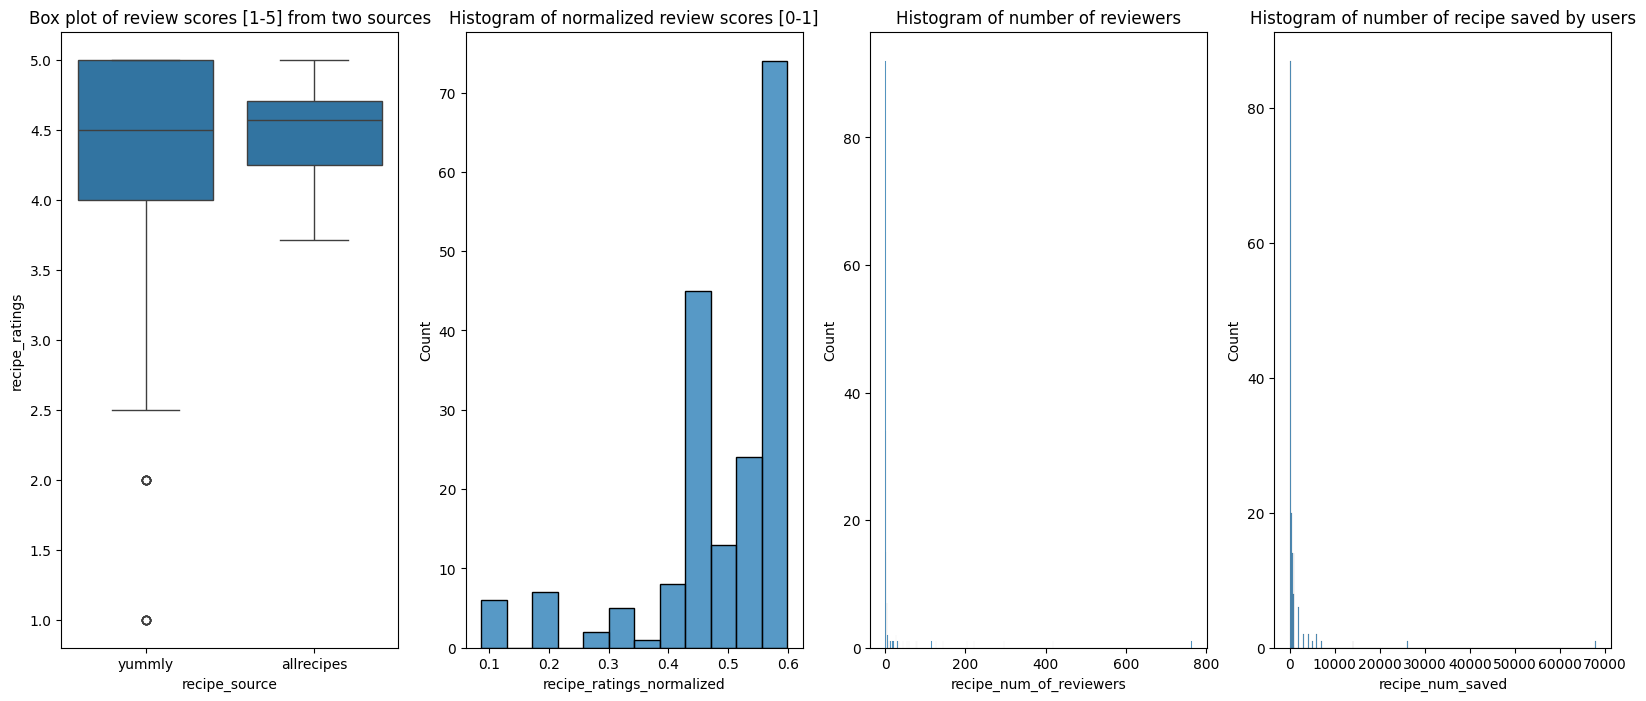


Bar plot of recipe counts for each ingredient (top 30)
----------------------


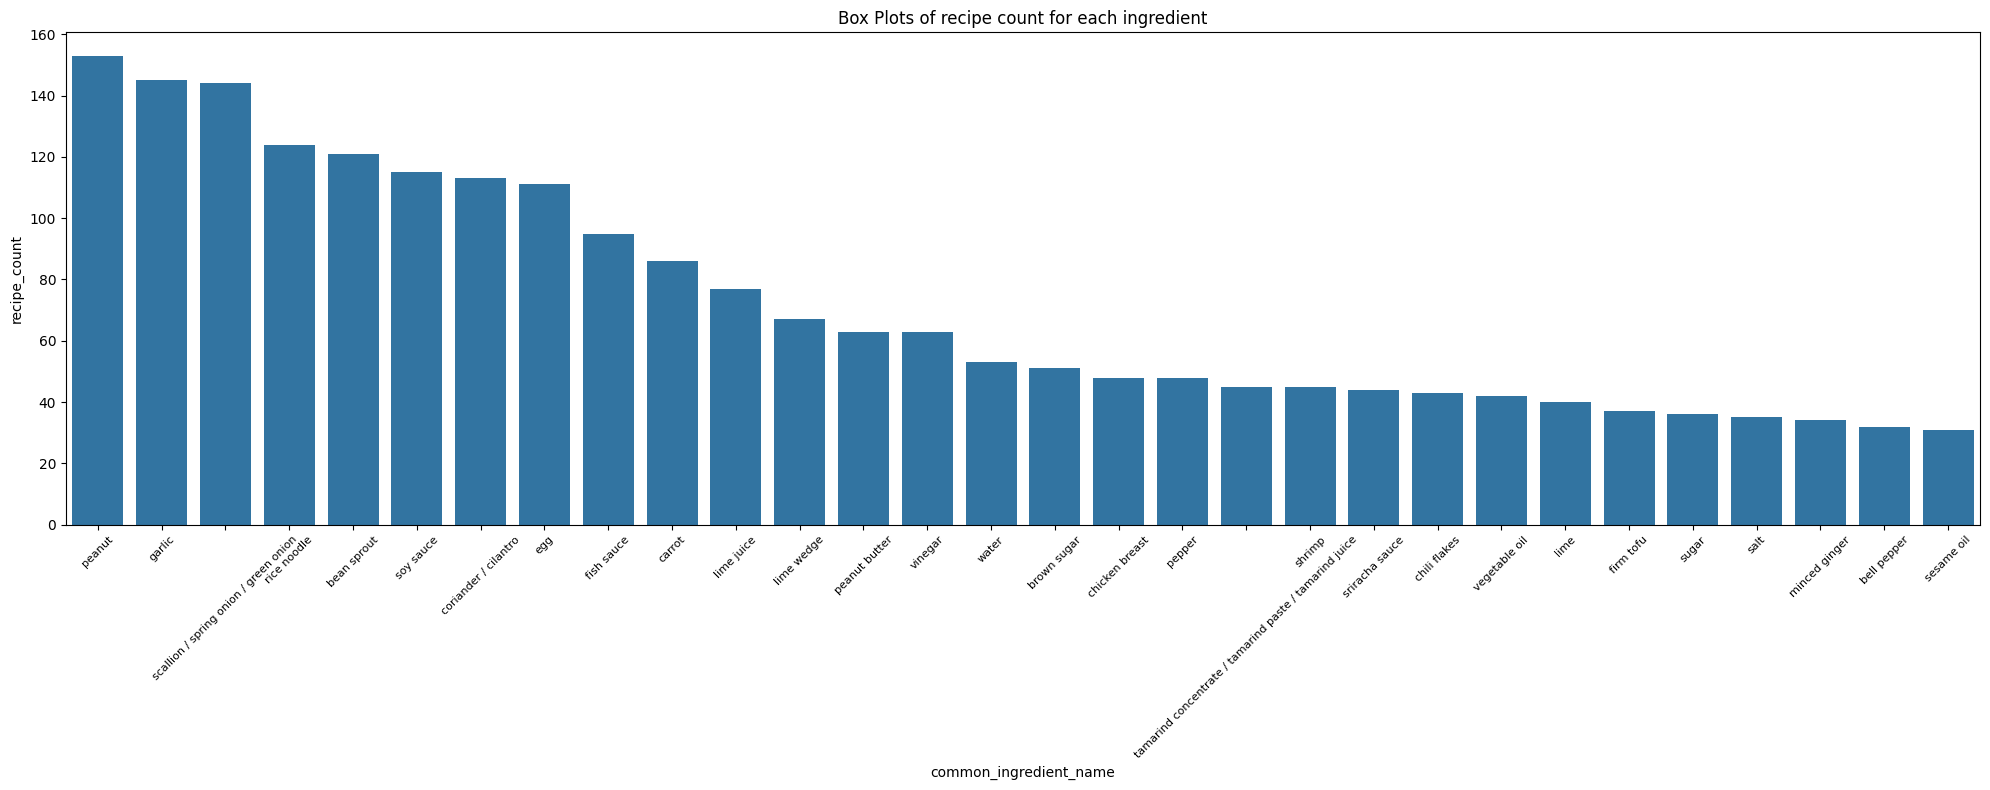


Box plots of top 30 ingredients, group by same scale of units
----------------------


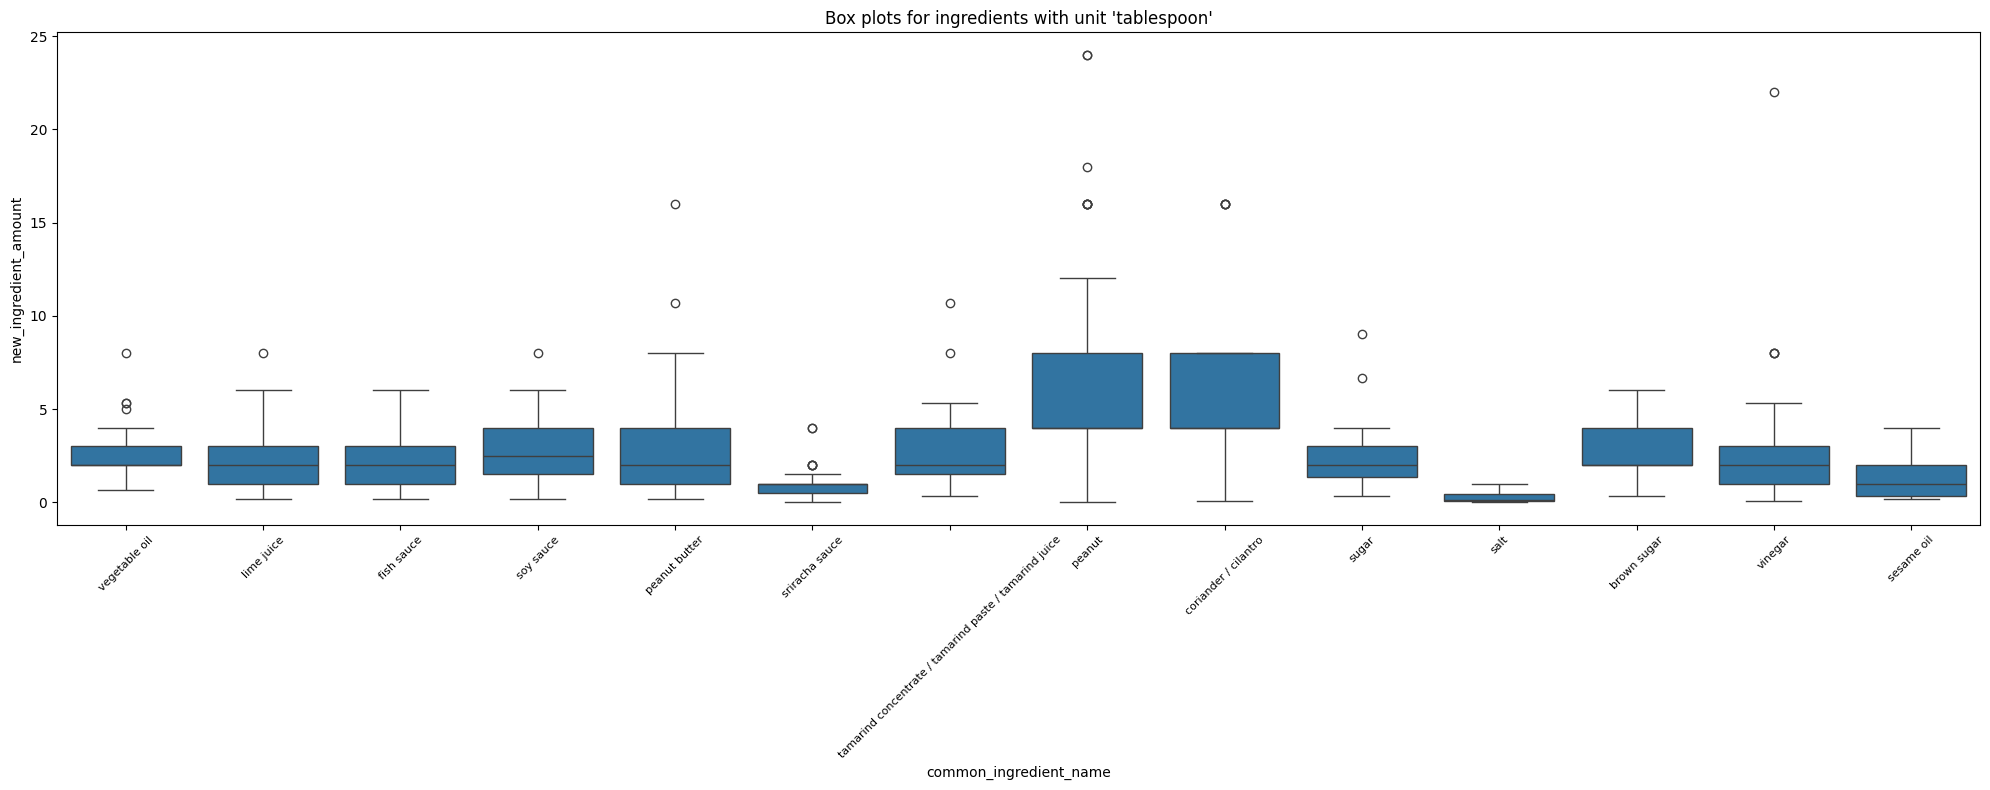

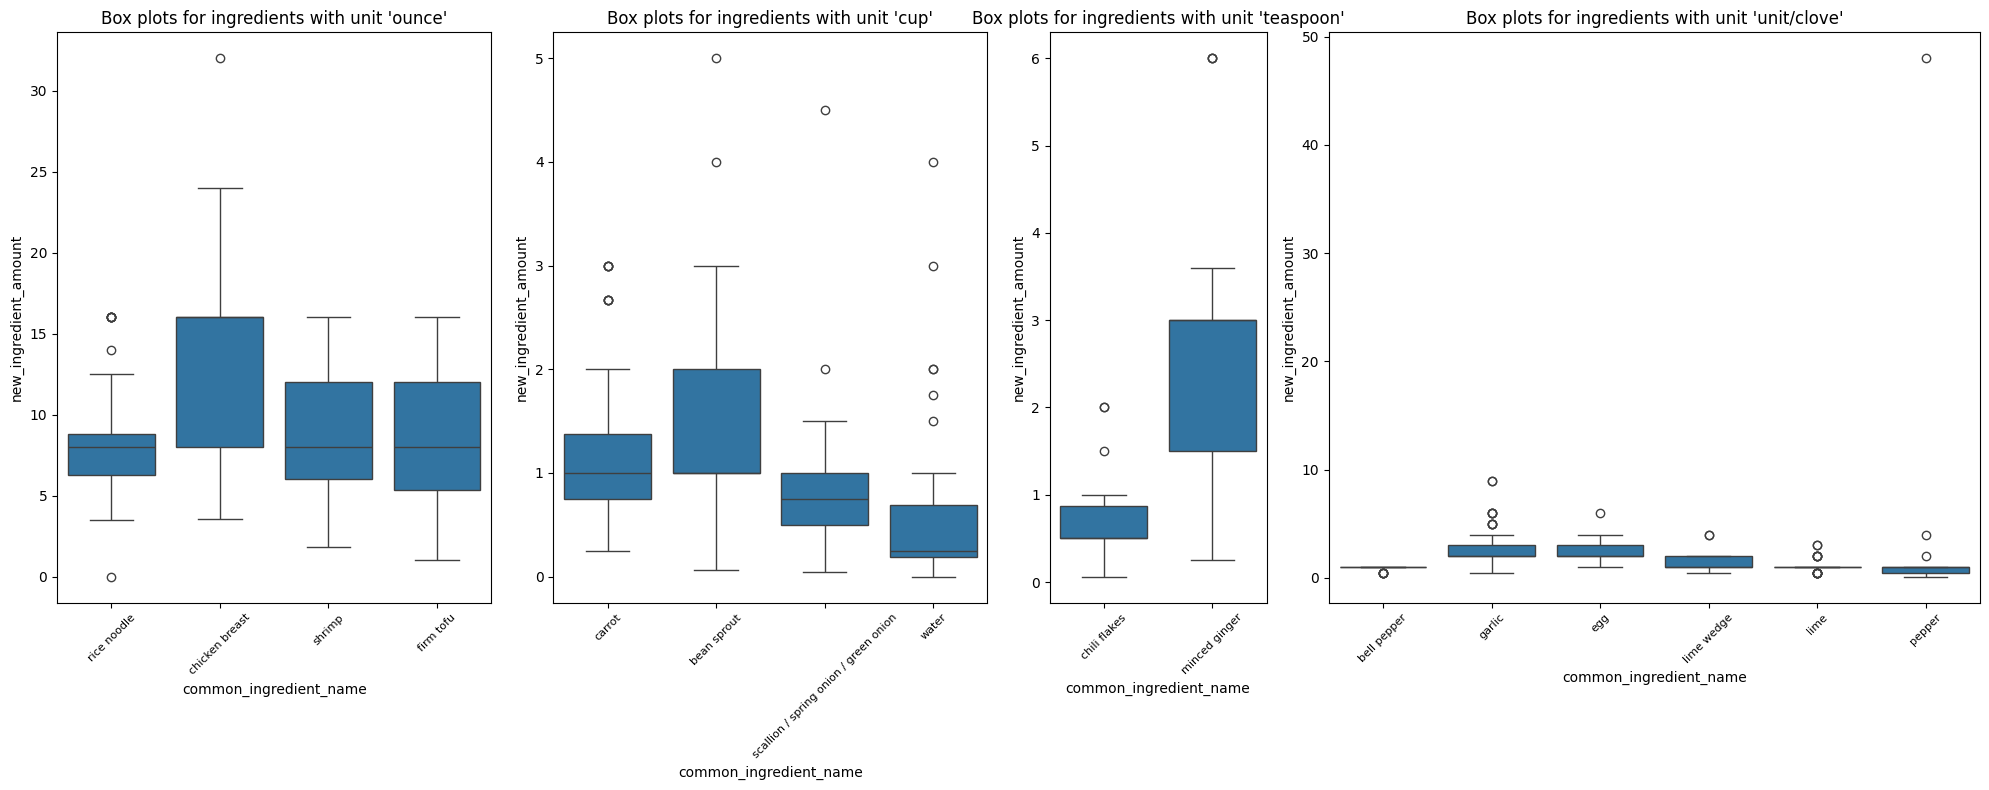


Scatter plots between normalized score, and each of top 10 ingredients
----------------------


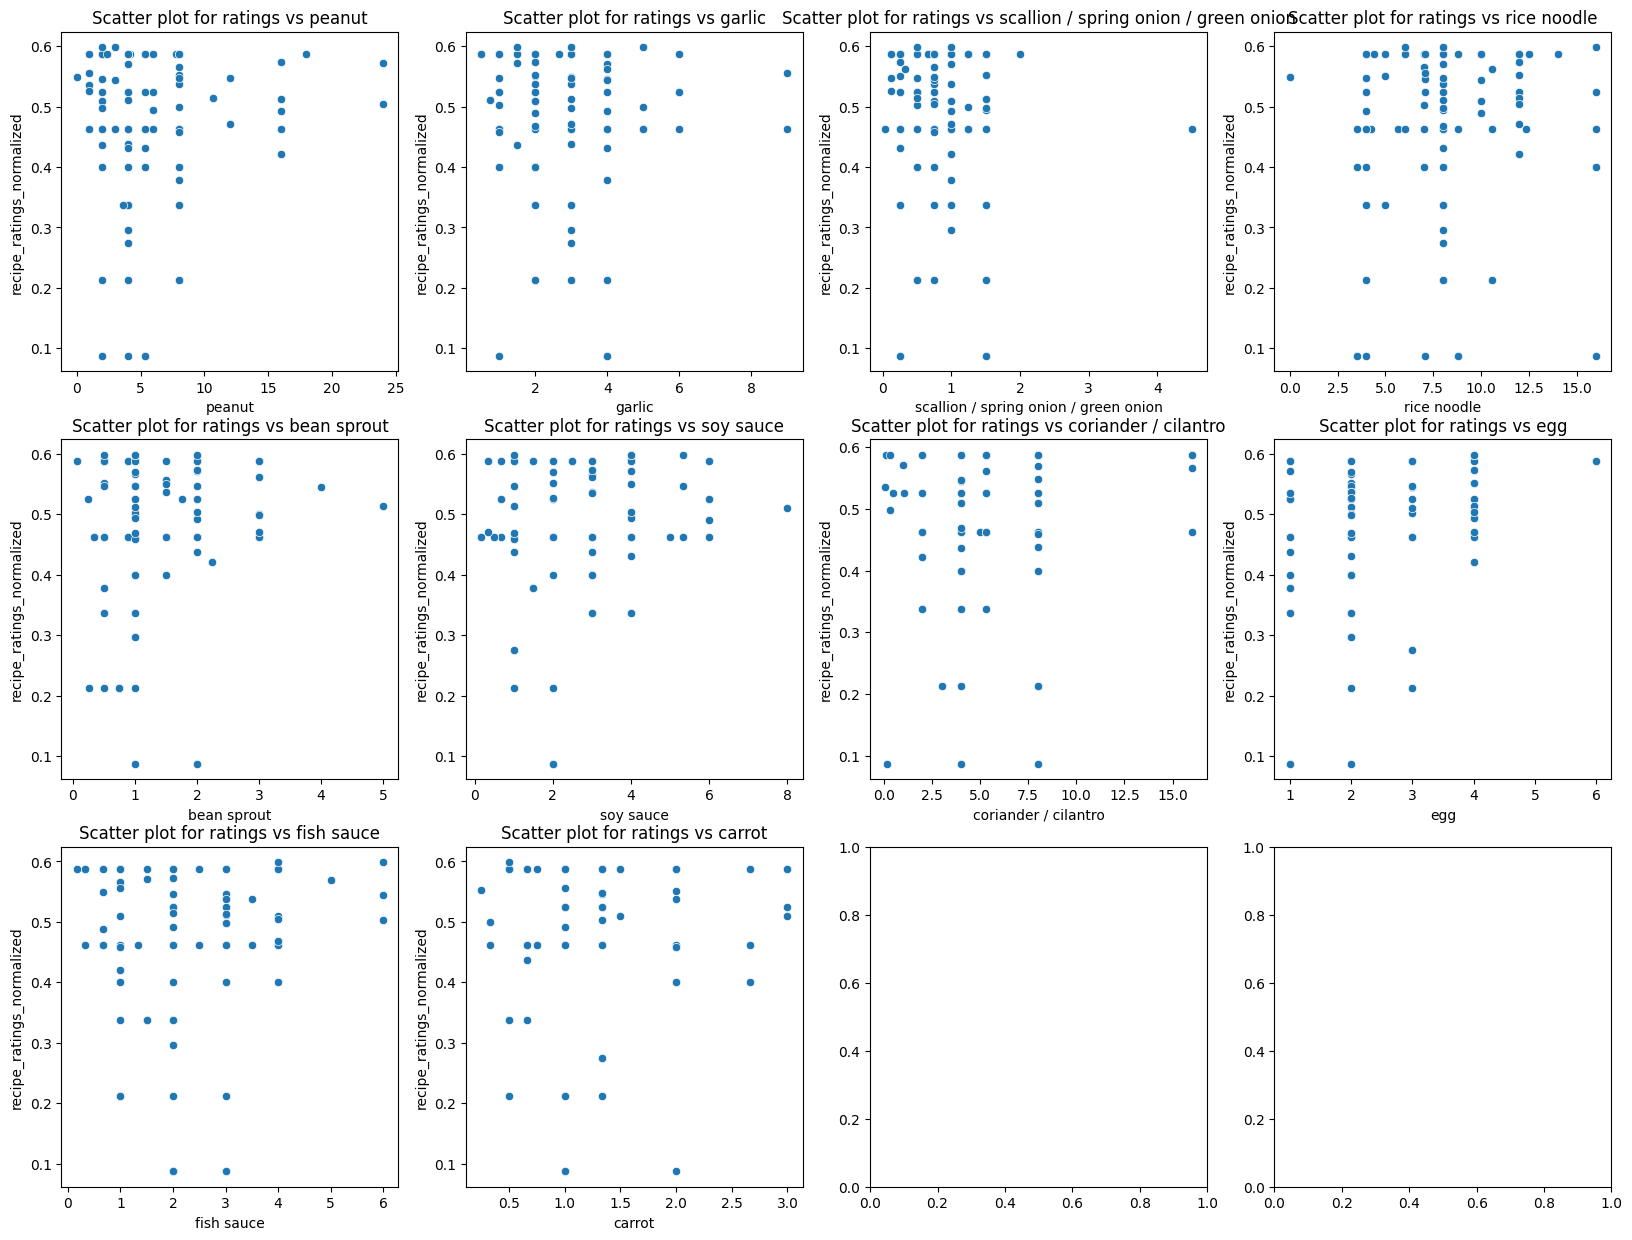


Histograms for top 10 ingredients
----------------------


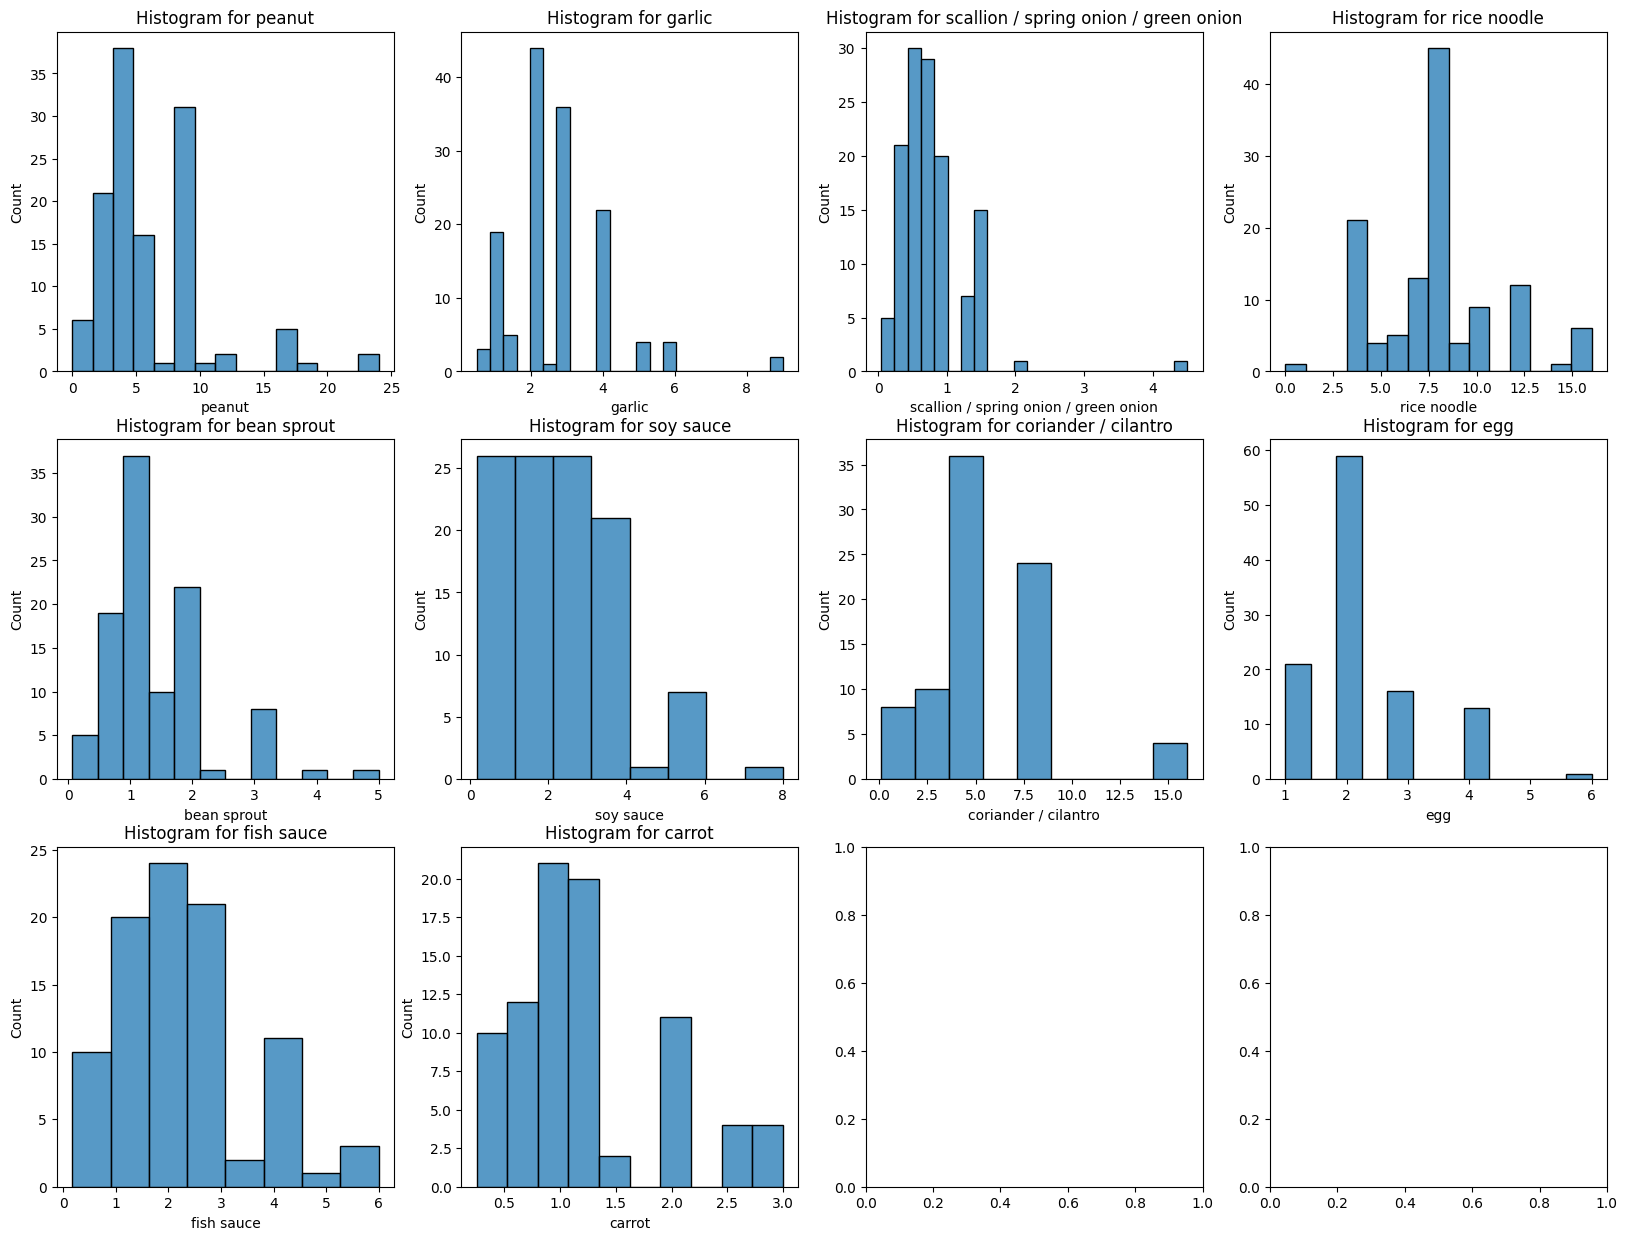


Scatter plots for pairs of ingredients with high POSITIVE correlation
----------------------


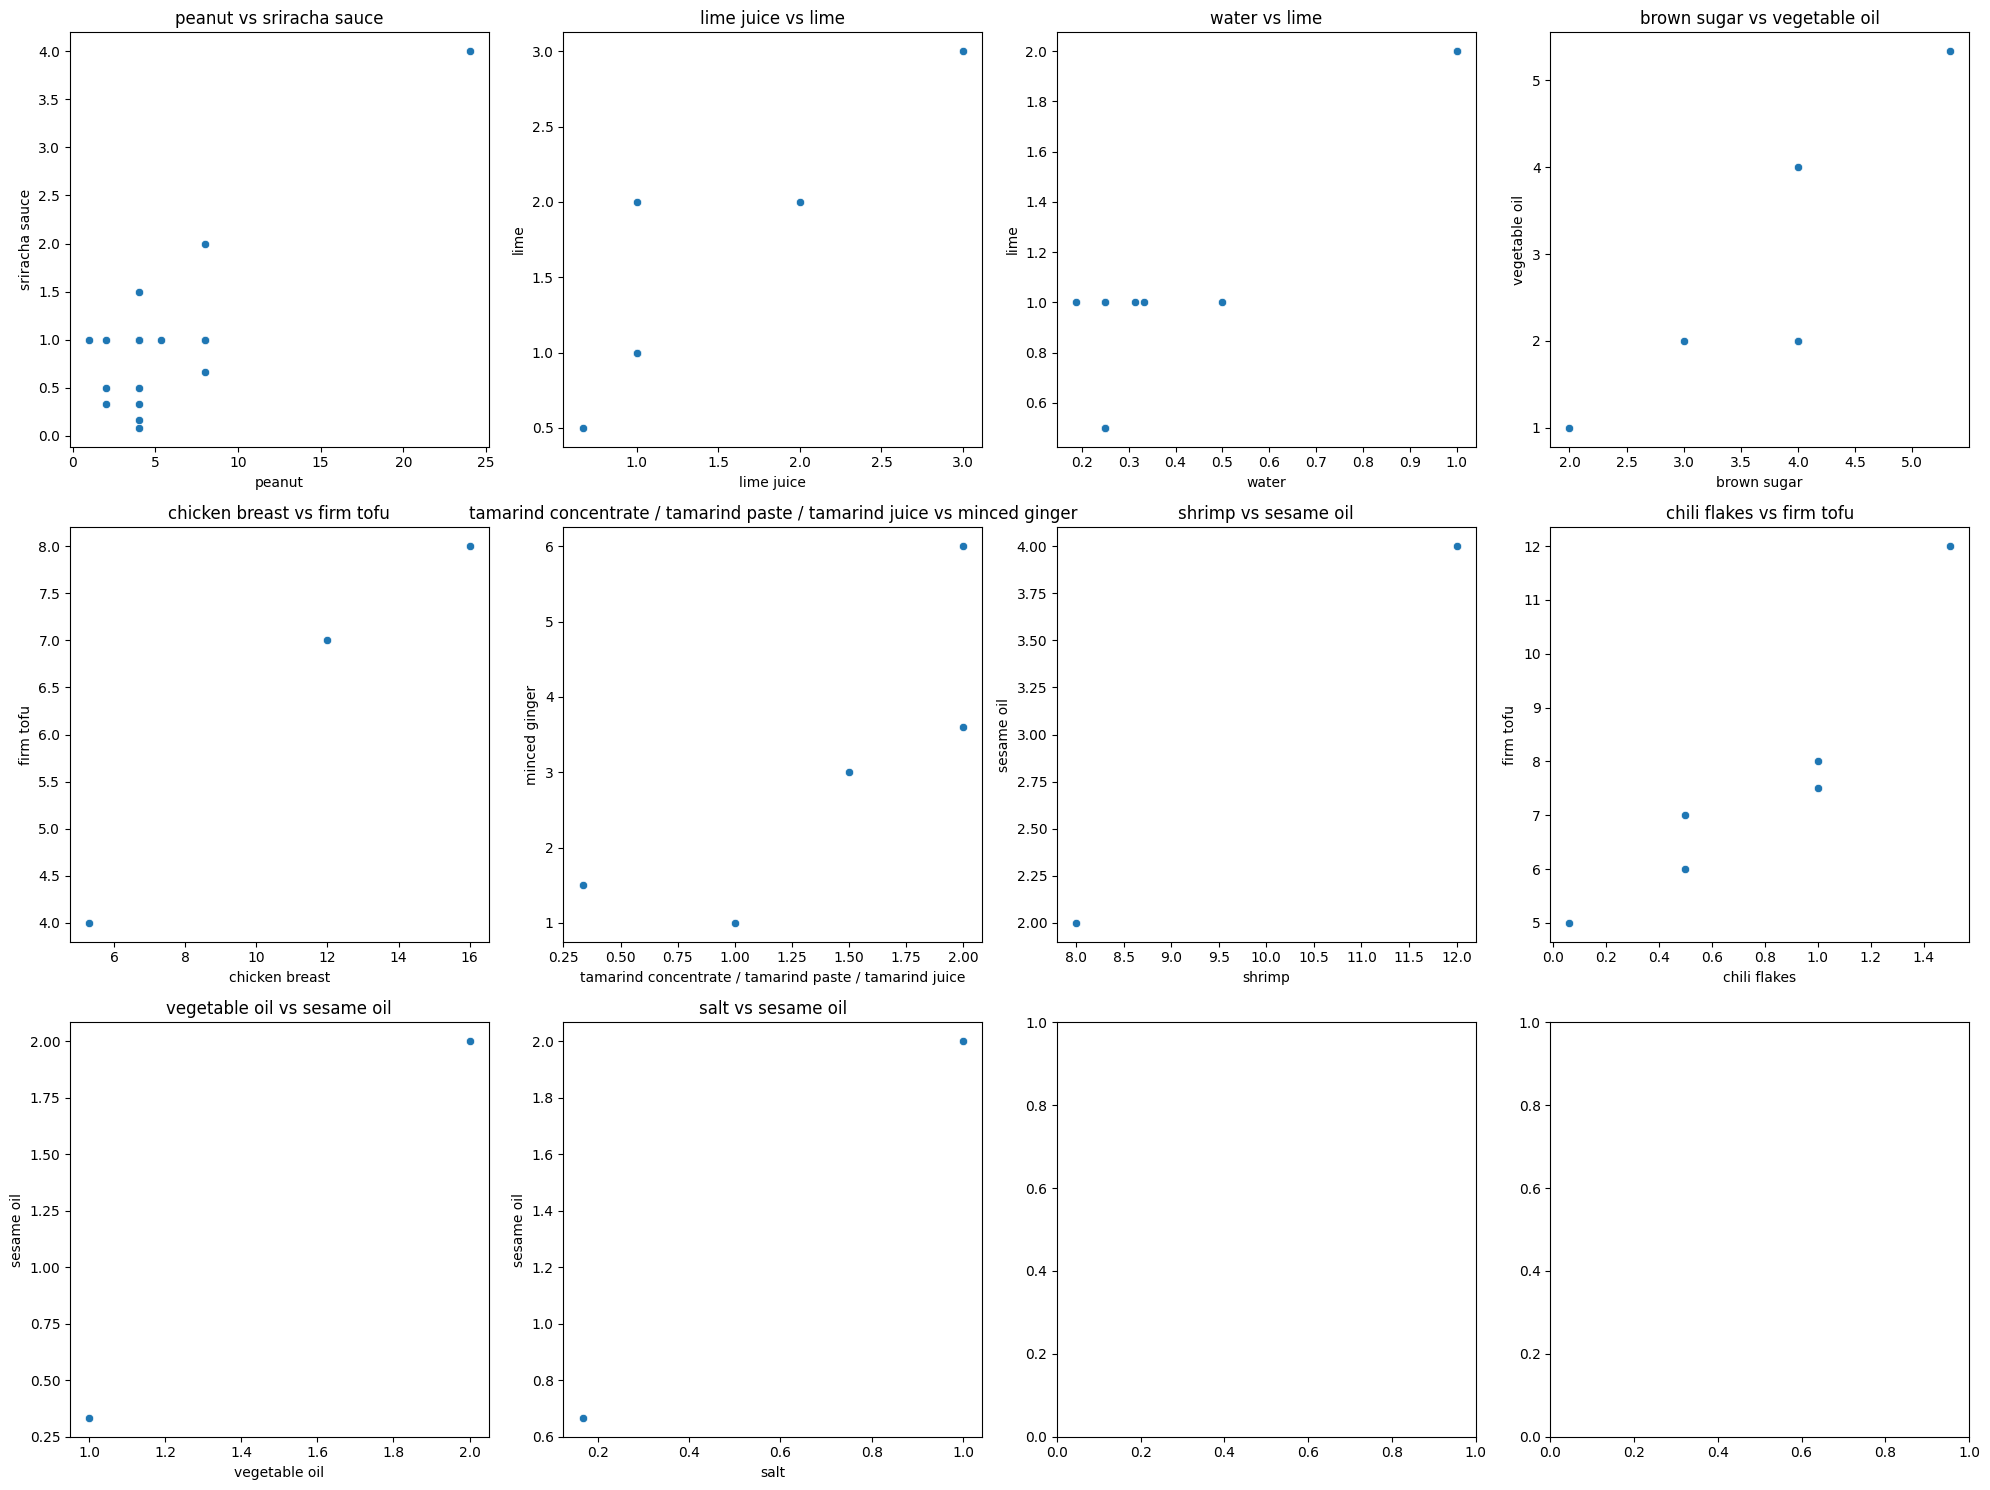


Scatter plots for pairs of ingredients with high NEGATIVE correlation
----------------------


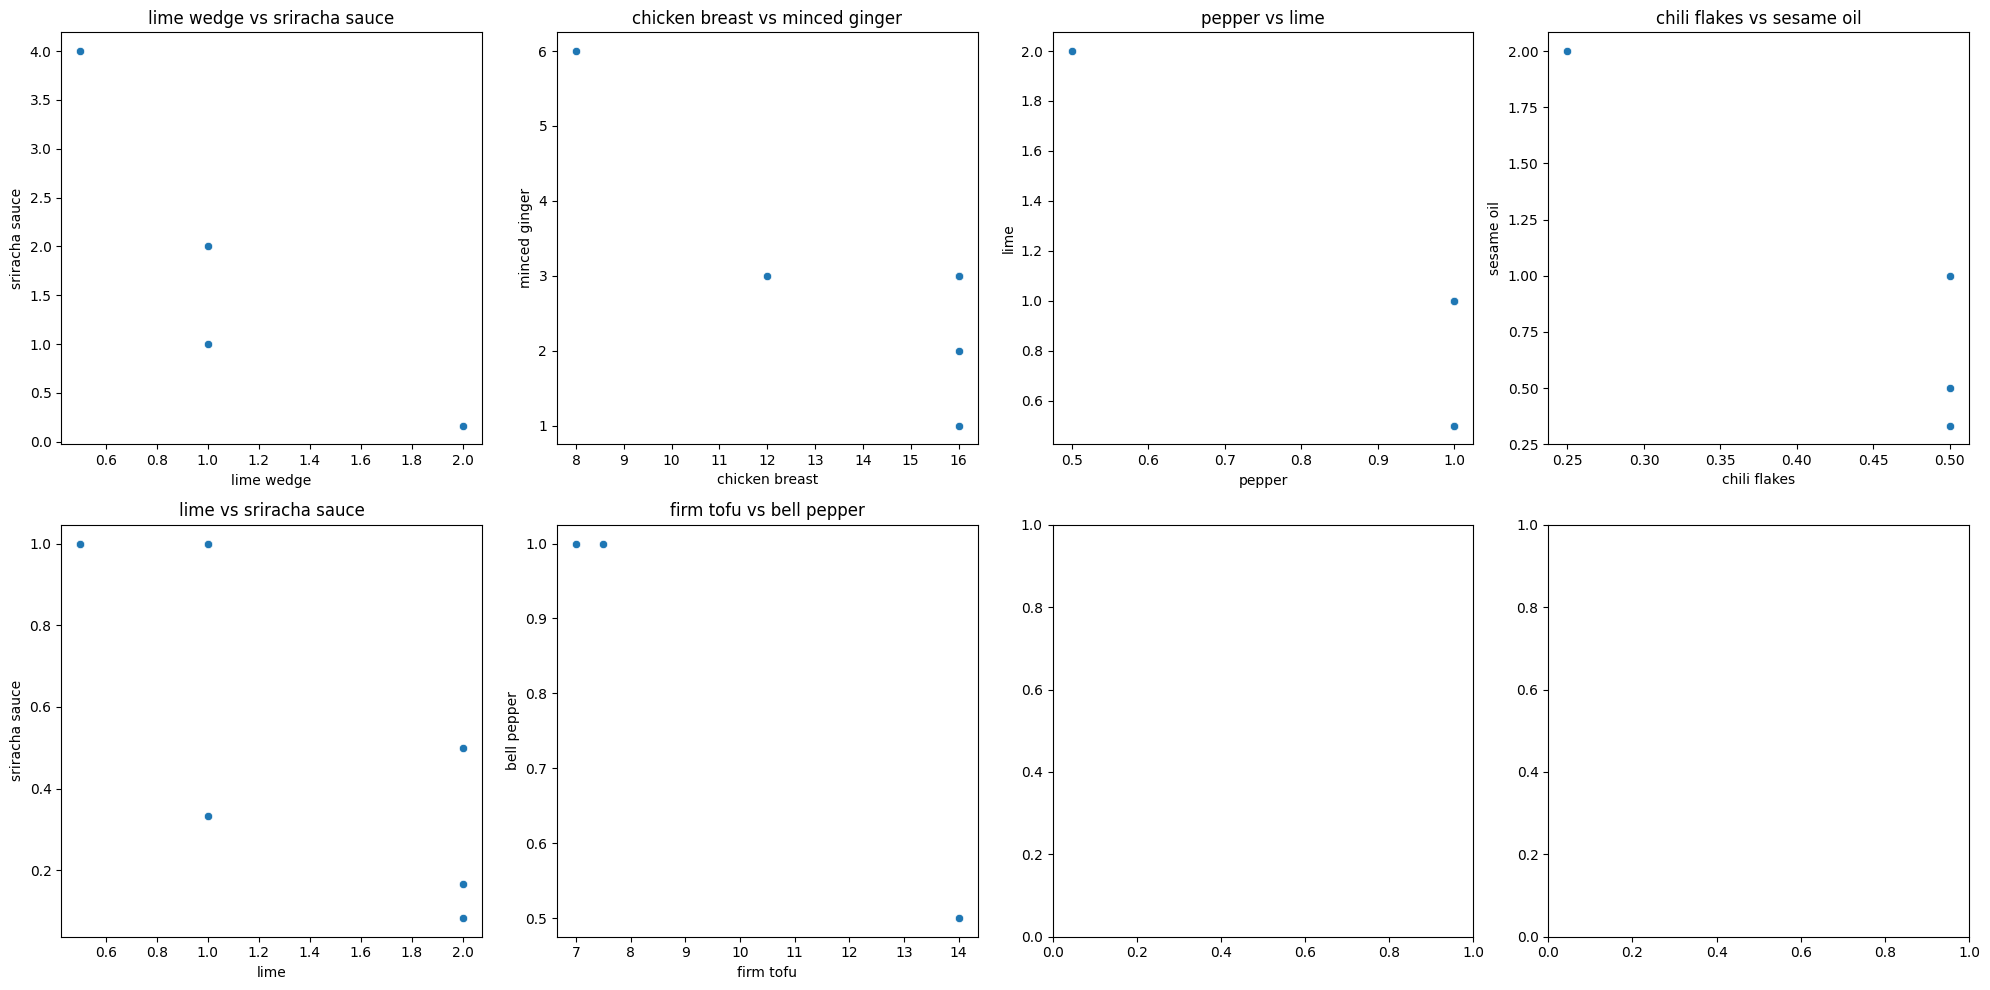

In [7]:
# Data Visualization

print("\nData Visualization")


print("\nBox plot and histogram of review scores, number of reviewers, and number of recipe saved by users")
print("----------------------")

# Box plot and histogram of review scores, number of reviewers, and number of recipe saved by users
fig, axes = plt.subplots(1, 4, figsize=(20, 8))
sns.boxplot(data=df_combined_recipe, x="recipe_source", y="recipe_ratings", ax=axes[0])
axes[0].set_title('Box plot of review scores [1-5] from two sources')

sns.histplot(data=df_combined_recipe, x="recipe_ratings_normalized", ax=axes[1])
axes[1].set_title('Histogram of normalized review scores [0-1]')

sns.histplot(data=df_combined_recipe, x="recipe_num_of_reviewers", ax=axes[2])
axes[2].set_title('Histogram of number of reviewers')

sns.histplot(data=df_combined_recipe, x="recipe_num_saved", ax=axes[3])
axes[3].set_title('Histogram of number of recipe saved by users')
plt.show()


print("\nBar plot of recipe counts for each ingredient (top 30)")
print("----------------------")

# Bar plot of recipe counts for each ingredient (top 30)
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=8)
plt.xticks(rotation=45)
sns.barplot(data=df_ingredient_sorted_recipe_count.head(30), x="common_ingredient_name", y="recipe_count")
plt.title('Box Plots of recipe count for each ingredient')
plt.tight_layout()
plt.show()


print("\nBox plots of top 30 ingredients, group by same scale of units")
print("----------------------")

# Box plots of top 30 ingredients, group by same scale of units
list_tablespoon = df_top30_list[df_top30_list['default_unit'] == 'tablespoon']['common_ingredient_name']
list_ounce = df_top30_list[df_top30_list['default_unit'] == 'ounce']['common_ingredient_name']
list_cup = df_top30_list[df_top30_list['default_unit'] == 'cup']['common_ingredient_name']
list_teaspoon = df_top30_list[df_top30_list['default_unit'] == 'teaspoon']['common_ingredient_name']
list_unit = df_top30_list[(df_top30_list['default_unit'] == 'unit') | (df_top30_list['default_unit'] == 'clove')]['common_ingredient_name']

# Box plots of ingredients, with unit "tablespoon"
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=8)
plt.xticks(rotation=45)
sns.boxplot(x='common_ingredient_name', y='new_ingredient_amount', data=df_combined_ingredient[df_combined_ingredient['common_ingredient_name'].isin(list_tablespoon)])
plt.title("Box plots for ingredients with unit 'tablespoon'")
plt.tight_layout()
plt.show()

# Box plots of ingredients, with unit ounce, cup, teaspoon, unit/clove
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(1, 4, width_ratios=[4, 4, 2, 6])

# Box plots of ingredients, with unit "ounce"
ax0 = plt.subplot(gs[0])
plt.xticks(fontsize=8)
plt.xticks(rotation=45)
sns.boxplot(x='common_ingredient_name', y='new_ingredient_amount', data=df_combined_ingredient[df_combined_ingredient['common_ingredient_name'].isin(list_ounce)], ax=ax0)
ax0.set_title("Box plots for ingredients with unit 'ounce'")

# Box plots of ingredients, with unit "cup"
ax1 = plt.subplot(gs[1])
plt.xticks(fontsize=8)
plt.xticks(rotation=45)
sns.boxplot(x='common_ingredient_name', y='new_ingredient_amount', data=df_combined_ingredient[df_combined_ingredient['common_ingredient_name'].isin(list_cup)], ax=ax1)
ax1.set_title("Box plots for ingredients with unit 'cup'")

# Box plots of ingredients, with unit "teaspoon"
ax2 = plt.subplot(gs[2])
plt.xticks(fontsize=8)
plt.xticks(rotation=45)
sns.boxplot(x='common_ingredient_name', y='new_ingredient_amount', data=df_combined_ingredient[df_combined_ingredient['common_ingredient_name'].isin(list_teaspoon)], ax=ax2)
ax2.set_title("Box plots for ingredients with unit 'teaspoon'")

# Box plots of ingredients, with unit "unit/clove"
ax3 = plt.subplot(gs[3])
plt.xticks(fontsize=8)
plt.xticks(rotation=45)
sns.boxplot(x='common_ingredient_name', y='new_ingredient_amount', data=df_combined_ingredient[df_combined_ingredient['common_ingredient_name'].isin(list_unit)], ax=ax3)
ax3.set_title("Box plots for ingredients with unit 'unit/clove'")

plt.tight_layout()
plt.show()


print("\nScatter plots between normalized score, and each of top 10 ingredients")
print("----------------------")

# Scatter plots between normalized score, and each of top 10 ingredients
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
h_count = 0
v_count = 0
for ingredient_name in top_10_ingredients:
    sns.scatterplot(data=df_ingredient_top10[['recipe_ratings_normalized', ingredient_name]], x=ingredient_name, y='recipe_ratings_normalized', ax=axes[v_count, h_count])
    axes[v_count, h_count].set_title(f'Scatter plot for ratings vs {ingredient_name}')
    h_count += 1
    if h_count == 4:
        h_count = 0
        v_count += 1
plt.show()


print("\nHistograms for top 10 ingredients")
print("----------------------")

# Histograms for top 10 ingredients
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
h_count = 0
v_count = 0
for ingredient_name in top_10_ingredients:
    sns.histplot(data=df_ingredient_top10[['recipe_id', ingredient_name]], x=ingredient_name, ax=axes[v_count, h_count])
    axes[v_count, h_count].set_title(f'Histogram for {ingredient_name}')
    h_count += 1
    if h_count == 4:
        h_count = 0
        v_count += 1
plt.show()


print("\nScatter plots for pairs of ingredients with high POSITIVE correlation")
print("----------------------")

# Scatter plots for pairs of ingredients with high positive correlation
top_pos_corr_pair = [['peanut', 'sriracha sauce'], ['lime juice', 'lime'], ['water', 'lime'], ['brown sugar', 'vegetable oil'], 
                     ['chicken breast', 'firm tofu'], ['tamarind concentrate / tamarind paste / tamarind juice', 'minced ginger'], ['shrimp', 'sesame oil'], ['chili flakes', 'firm tofu'],
                     ['vegetable oil', 'sesame oil'], ['salt', 'sesame oil']]

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
h_count = 0
v_count = 0
for ingredient_name_X, ingredient_name_Y in top_pos_corr_pair:
    sns.scatterplot(data=df_ingredient_top30[[ingredient_name_X, ingredient_name_Y]], x=ingredient_name_X, y=ingredient_name_Y, ax=axes[v_count, h_count])
    axes[v_count, h_count].set_title(f'{ingredient_name_X} vs {ingredient_name_Y}')
    h_count += 1
    if h_count == 4:
        h_count = 0
        v_count += 1
plt.tight_layout()
plt.show()


print("\nScatter plots for pairs of ingredients with high NEGATIVE correlation")
print("----------------------")

# Scatter plots for pairs of ingredients with high nagative correlation
top_neg_corr_pair = [['lime wedge', 'sriracha sauce'], ['chicken breast', 'minced ginger'], ['pepper', 'lime'], ['chili flakes', 'sesame oil'], 
                     ['lime', 'sriracha sauce'], ['firm tofu', 'bell pepper']]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
h_count = 0
v_count = 0
for ingredient_name_X, ingredient_name_Y in top_neg_corr_pair:
    sns.scatterplot(data=df_ingredient_top30[[ingredient_name_X, ingredient_name_Y]], x=ingredient_name_X, y=ingredient_name_Y, ax=axes[v_count, h_count])
    axes[v_count, h_count].set_title(f'{ingredient_name_X} vs {ingredient_name_Y}')
    h_count += 1
    if h_count == 4:
        h_count = 0
        v_count += 1
plt.tight_layout()
plt.show()

***
#### **Interpretation of Data Visualizations**

Some histogram visualizations shows that the features may be Gaussian-like, however, many are not.<br>

Based on box plots, several features seems to have outliers.<br>

We have to be careful for any analysis that assume normal distribution, as many features are not Gaussian-like.<br>

Several scatter plots of ingredient pairs that show high correlation in the correlation matrix, turn out to have only a few data points. In order to imply that these pairs actually have high correlation, we have to add more recipes from other recipe sources to our analysis.<br>
***

#### **Missing Values, Duplicates, and Outliers**

**Duplicates:**<br>
There is no duplicated rows in the dataset.<br>

**Missing Values:**<br>
**recipe_num_saved and ingredient_remainder:**<br>
The number of saved recipes (recipe_num_saved) are from Yummly.com only, as it does not exist on Allrecipes.com. The ingredient_remainder comes from a text description/detail of how to prepare ingredients before cooking, and is available on Yummly.com. On Allrecipes.com, the detail/preparation note of ingredients are included in the name of the ingredients themselves.<br>

While many of ingredient_remainder are missing, we should retain it for further qualitative analysis (to complement our quantitative analysis). In fact, we used ingredient_remainder to determine common ingredient name, ingredient category, ingredient unit, or ingredient amount for some ingredients, because some recipe creators chose to provide those detail in ingredient_remainder instead.

**Ingredient amount/unit:**<br>
There are some missing data in ingredient amount/unit from the sources (original_ingredient_amount and original_ingredient_unit), as the creators did not specify them on the websites. We left them  missing as it is, and provide new_ingredient_unit as a substitute. The new_ingredient_unit utilitzed default_unit, to fill in missing ingredient units. In case where original_ingredient_amount is missing, the new_ingredient_amount is left being NaN, as it may impact our analysis, such as calculation of simple mean.<br>

There are some ingredients with high proportion of missing ingredient amount, especially those used for just garnishing (chili, lime/lemon, etc.), or typical ingredients such as water. Users of this dataset may choose to remove certain categories of these ingredients (for garnishing) while keeping the rest for their own analysis. For those that are not for garnishing, we cannot remove them, as they may be vital to recipes. In fact, we may consider using the existence of them (existing or not) as one of the variables/flag for analysis.


**Outliers:**<br>
There are several features that seem have outliers. However, we cannot remove these as they are from recipes for special needs, such as vegan, high-protein, keto, or low-fat/low-carb, which contains higher/lower amount of ingredients than typical recipes.<br>
***

#### **Data Transformation and New Features**

By webscraping, we get original ingredient name, amount, and unit from the two websites. Mapping table from ingredient_unit_mapping.csv is used to map original measurement unit to equivalent common name of unit. With unit_conversion.csv, measurement unit conversion has been applied such that all similar ingredients used the same default_unit, where possible.<br>

We use ingredient_name_mapping.csv to identify common_ingredient_name for each original ingredient name, while ingredient_category_mapping.csv maps common_ingredient_name to ingredient_category.<br>

**New Feature: recipe_ratings_normalized**<br>
We use two food recipe portal websites in order to increase sample size, so we have to normalize scores first because the mean of ratings from the two websites are different. For example, ratings given by a website with a lot of food experts may be lower compared to a website targeting beginners.<br>

We have normalized ratings from the two websites by subtracting the review scores with its own weighed average of ratings, dividing by range of possible max/min scores that all users can give in reviews [max score: 5, min score: 1, range = 5 - 1 = 4]. This results in new ratings ranging from -1 to 1. After that, we rescale them by adding 1 and dividing it by 2, in order to get new ratings ranging from 0 to 1. The normalized ratings are provided in order to facilitate comparison of ratings from two different recipe sources.<br>

**Interpretation of New Features:**<br>
The normalized ratings ranges from 0 to 1, which are easier to use to train a model. It reflects how far individual review score from its respective weighted average ratings on its website. Its mean is 0.493320, and the median is 0.524874, which is close to the mean, with min of 0.087374, max of 0.598381, and standard deviation of 0.118206. Based on the histogram, however, we found that the ratings are clustered around the range from 0.45 to 0.60. The normalized ratings is perfectly correlated to original ratings on the two websites.<br>

The preliminary analysis and visualization of normalized ratings are provided in the sections above. (Descriptive Statistics, Variable Relationships, and Data Visualization)<br>
***

#### **Dimensionality Reduction**

We have not performed dimensionlity reduction by using PCA or other methods. We, nevertheless, provide ingredient_category as an alternative to common_ingredient_name.
There are over 178 common_ingredient_name in the dataset (608 for original ingredient name), while the number of ingredient_category is just 27.<br>

The number of ingredient_category can be further reduced by removing some categories which are not typically used in Pad Thai, such as quinoa, rice paper wrappers, seaweed, yeast, and cheese/butter. If you choose to remove these ingredient categories, their associated recipes (only a few recipes) should also be removed. Water can also be removed as it is generally required in cooking, and many creators excluded it from the list of ingredients. In case where water category is removed, no need to remove relevant recipes because the remaining recipes also used water but they exclude water from their ingredient list. The number of ingredient_category after removal of these categories is 21.<br>

The mapping used to identify common_ingredient_name for each original ingredient name is provided in ingredient_name_mapping.csv, while ingredient_category_mapping.csv maps common_ingredient_name to ingredient_category.<br>

Where ingredient_category is used as a replacement for common_ingredient_name, there should be some information loss after the reduction.<br>
***

#### **Data Quality Assessment**

**Data Profiling:**<br>
This Pad Thai recipe data is collected from two data sources: Yummly.com and Allrecipes.com in October 2024, by web scraping. It comprises of 185 Pad Thai recipes recipes, all of which includes recipe name, creator name, review score (ratings), link to website, and corresponding ingredient name/amount/unit.<br>

The ratings and ingredient amount are provided in numerical float format, while the rest are text. There are some missing data in original ingredient amount/unit from the sources and are intentionally left missing as it is. The new_ingredient_unit utilitzed default_unit, to fill in missing ingredient units. <br>

**Data Completeness:**<br>
We found some missing values that we may be able to handle, and it is ingredient unit. Missing ingredient amount is not filled with zero, as it may impact our analysis, such as calculation of arithmetic mean.<br>

**Data Accuracy:**<br>
All records are pulled from two websites by webscraping tool. We have done a random cross-check a sample of records on the two websites.<br>

**Data Consistency:**<br>
Based on most frequent values, there is no potential inconsistencies or anomalies.<br>

**Data Integrity:**<br>
recipe_id are unique, and ingredient data seems to be in line with typical Pad Thai recipes outside Thailand.<br>

**Data Lineage and Provenance:**<br>
The Pad Thai recipe dataset is collected Yummly.com and Allrecipes.com, two prominent recipe portals in October 2024, by web scraping. The recipes were created by users on these portals, and review scores were given by other users of these platforms<br>

We provide normalized ratings in order to facilitate comparison of ratings from two different recipe sources, and also provide ingredient category to effectively reduce dimensionality of the dataset.<br>